<a href="https://colab.research.google.com/github/swaroop-raj/machine-learning/blob/main/Term_Deposit_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement (Term Deposit Sale)

We have data from a Portuguese bank on details of customers related to selling a term deposit. The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio.


### What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

 

### Resources Available

The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

 

### Deliverable –1 (Exploratory data analysis)–(15)

** Univariate analysis (9marks) **
Data types and description of the independent attributes which should include (name,  range of values observed, central values (mean and median), standard deviation and quartiles, skewness). - 3 Marks
Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric. - 3 Marks
Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not? - 3 Marks

** Multivariate analysis (6marks) **
Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable? - 3 Marks
Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves. - 3 Marks
 

### Deliverable –2 (Prepare the data for analytics)–(5)

Label encode or create dummy variables for categorical variables. Give reason for selecting either of them. - 2 Marks
Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data. - 3 Marks
 

### Deliverable –3 (Create the ensemble model)–(30)

Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. - 10 Marks
Also reflect the training and testing score of all the models. Build a dataframe with model names as row index and all the metrics calculated as columns - 5 Marks
Explain the confusion matrix related terms like recall, precision etc. Also, select the best metric to choose one of the models from above. Give your reason for the same. - 5 Marks
Answer the following questions : - 10 Marks
What do you mean by recall and what information does it provide here?
Suggest some changes for the organization so that they can increase the number of customers who take term deposit.
How much influence does the previous campaign and mode of interaction have on financial performance.
Which features should be more/less focused by the bank to get better results and why?
What did you learn about banking industries from this data?
 

** Note : ** Use random_state=7 (wherever the parameter can be used) so that we can compare all submissions.

## Attribute Information

1. age
2. job : type of job
3. marital : marital status
4. education
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign
17. Output variable ('Target'): has the client subscribed a term deposit?

## `Index`

----------------------
- <a href = #link1>Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation</a>


- <a href = #link2>Exploratory Data Analysis</a> 

    - <a href = #link3>Number of unique in each column?</a> 
    - <a href = #link4>Number of people with zero mortgage?</a> 
    - <a href = #link5>Number of people with zero credit card spending per month?</a> 
    - <a href = #link6>Value counts of all categorical columns.</a> 
    - <a href = #link7>Getting Data Model ready</a> 
    - <a href = #link8>Univariate Analysis</a> 
    - <a href = #link10>Bivariate Analysis</a> 

- <a href = #link11>Model building using Logistic Regression from Sklearn</a>

    - <a href = #link12>Split the data into training and test set in the ratio of 70:30 respectively</a> 


- <a href = #link13>Use the Logistic Regression model to predict whether the customer will take a personal loan or not.</a> 

- <a href = #link14>Metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score)</a> 

- <a href = #link15>Heatmap to display confusion matrix</a> 

- <a href = #link16>Graph to show the ROC Curve</a>

- <a href = #link17>Coefficients of the attrbutes</a>

- <a href = #link18>Rows where the predicted class is not equal to the observed class</a>

- <a href = #link19>Conclusion Buisness Insights</a>

## <a id = "link1"></a> Import Libraries and Load Dataset

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Importing the libraries for ploting
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#importing train test split from sklearn for preraing traing and test dataset for the logistic model

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

**Reading the dataset:**

In [4]:
df = pd.read_csv('/content/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [5]:
df.shape

(45211, 17)

**Null checks the dataset:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# There are no null values in the sample dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

**Insights:**
- `There are no null vaues in the data set`

**Stastical description of the dataset:**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## <a id = "link2"></a> Exploratory Data Analysis

### <a id = "link3"></a> Number of unique in each column?

In [ ]:
print ('-------Unique value for the complete dataset---------')
print (df.nunique())
print()
print ('-------Unique value for only customers who have accepted personal loan---------')
df[df['Personal Loan']==1].nunique()

-------Unique value for the complete dataset---------
ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

-------Unique value for only customers who have accepted personal loan---------


ID                    480
Age                    40
Experience             42
Income                102
ZIP Code              238
Family                  4
CCAvg                  95
Education               3
Mortgage              141
Personal Loan           1
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Insights:**
- `ID / Customer is basically the unique ID for the customer which is not adding much value to the model.Hence it can be dropped.`
- `Customers who accepted the Personal Loan campain are located 238 unique zip codes, which is almost 50% spread for all unique zip codes in the data sample. This implies customer's geography / location doesnt affects much on the acceptance of personal loan . Hence zip code can be dropped.`
- `Family, Education, Personal Loan, Securities Account, CD Account, Online, Credit Card are all categorical features as it has very less unique values`


In [ ]:
# Dropping ID & Zip Code column as mentioned in above Insights
lg_df = df.drop(['ID' , 'ZIP Code'], axis =1 ) 
#Converting Family, Education, Personal Loan, Securities Account, CD Account, Online, Credit Card to categorial data type.
lg_df['Family'] = lg_df['Family'].astype('category')
lg_df['Personal Loan'] = lg_df['Personal Loan'].astype('category')
lg_df['Securities Account'] = lg_df['Securities Account'].astype('category')
lg_df['CD Account'] = lg_df['CD Account'].astype('category')
lg_df['Online'] = lg_df['Online'].astype('category')
lg_df['CreditCard'] = lg_df['CreditCard'].astype('category')
lg_df.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

### <a id = "link4"></a> Number of people with zero mortgage?

In [ ]:
print ('Number of people with Zero Mortgage : ') 
print(df[df['Mortgage'] == 0].shape[0])

Number of people with Zero Mortgage : 
3462


### <a id = "link5"></a> Number of people with zero credit card spending per month?

In [ ]:
print ('Number of people with Zero credit card spending per month : ') 
print(df[df['CCAvg'] == 0].shape[0])

Number of people with Zero credit card spending per month : 
106


### <a id = "link6"></a> Value counts of all categorical columns.

In [ ]:
 #  value counts of all category type columns
for i in list(lg_df.columns[lg_df.dtypes=='category']):  
    print(lg_df[i].value_counts(normalize=True))
    print()

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



### <a id = "link7"></a> Getting Data Model ready

In [ ]:
# Dropping ID & Zip Code column as mentioned in above Insights
lg_df = df.drop(['ID' , 'ZIP Code'], axis =1 ) 
lg_df['Education'].replace({1:'Undergrad', 2:'Graduate' , 3:'Advanced/Professional'},inplace=True)
lg_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


### <a id = "link8"></a> Univariate Analysis

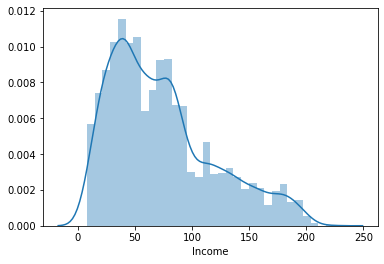

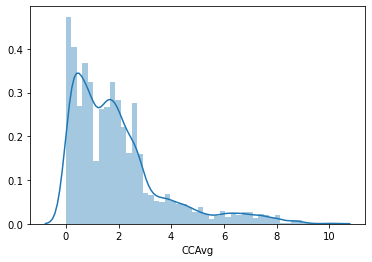

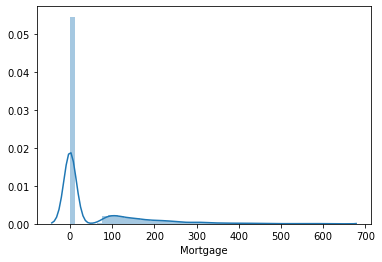

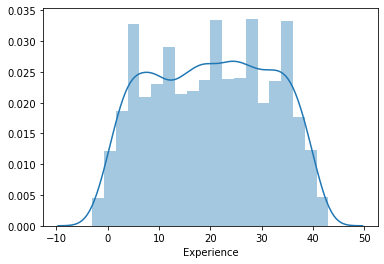

In [ ]:
sns.distplot(df['Income'])
plt.show()
sns.distplot(df['CCAvg'])
plt.show()
sns.distplot(df['Mortgage'])
plt.show()
sns.distplot(df['Experience'])
plt.show()

In [ ]:
lg_df['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

**Insights:**
- `There is huge dis proportionate beetween personal loan values . As only 9.6 percent of data has customer taken personal loan

### <a id = "link10"></a> Bivariate Analysis

In [ ]:
lg_df.groupby(['Personal Loan']).mean()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.367257,20.132301,66.237389,2.373451,1.729009,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,100.845833,0.125000,0.291667,0.606250,0.297917


In [ ]:
lg_df.groupby(['Personal Loan']).median()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.0,20.0,59.0,2.0,1.4,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,3.0,3.8,0.0,0.0,0.0,1.0,0.0


**Insights:**
- `Income, CCAvg and Mortgage values are higher for people who have taken loan `

In [ ]:
pd.crosstab(lg_df['Family'],lg_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
Family,,
1,0.301991,0.222917
2,0.263274,0.220833
3,0.194027,0.277083
4,0.240708,0.279167


**Insights:**
- `Customer who have taken Personal loan have equal family distribution`

In [ ]:
pd.crosstab(lg_df['Securities Account'],lg_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
Securities Account,,
0,0.897788,0.875
1,0.102212,0.125


**Insights:**
- `Customer who dont have a securities account have a higher rate of taking personal loan `

In [ ]:
pd.crosstab(lg_df['CD Account'],lg_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


**Insights:**
- `Customer who dont have CD Account have higher rate of taking Personal Loan`

In [ ]:
pd.crosstab(lg_df['Online'],lg_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
Online,,
0,0.404204,0.39375
1,0.595796,0.60625


**Insights:**
- Customer who have a online account have slightly higher chances of taking personal loan`

In [ ]:
pd.crosstab(lg_df['CreditCard'],lg_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
CreditCard,,
0,0.706416,0.702083
1,0.293584,0.297917


## <a id = "link11"></a> Model building using Logistic Regression from Sklearn 

In [ ]:
## Defining  X and Y variables

X = lg_df.drop('Personal Loan', axis=1)
Y = lg_df['Personal Loan']    


In [ ]:
#Converting values of data type as category to dummy variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,45,19,34,3,1.5,0,1,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0


### <a id = "link12"></a> Split the data into training and test set in the ratio of 70:30 respectively

In [ ]:
##Spliting data into training and testing data for the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=5)

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=876443356,fit_intercept=False)
# providing the training data to fit the logistic regression model
logreg.fit(X_train, y_train)                   

LogisticRegression(fit_intercept=False, random_state=876443356)

### <a id = "link13"></a> Use the Logistic Regression model to predict whether the customer will take a personal loan or not.

In [ ]:
# Predict the target variable ( Loan Status) on test data
y_predict = logreg.predict(X_test)             

In [ ]:
# Observe the predicted and observed classes in a dataframe.

output = X_test.copy()
output['Observed Loan Status'] = y_test
output['Predicted Loan Status'] = y_predict
output[output['Predicted Loan Status']==1]

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergrad,Observed Loan Status,Predicted Loan Status
4292,63,37,191,2,4.3,205,0,0,0,0,0,0,1,1
3276,55,31,159,1,3.9,0,0,0,0,0,0,0,1,1
4154,51,25,163,2,1.3,0,0,0,1,0,0,0,1,1
1402,55,29,172,1,5.2,0,0,0,0,0,1,0,1,1
4147,59,35,180,2,6.5,0,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,56,32,173,1,4.6,88,0,1,1,0,1,0,1,1
2664,54,29,154,1,2.4,352,0,0,1,0,1,0,1,1
3006,62,37,169,3,5.0,184,0,1,1,1,1,0,1,1
4267,52,26,194,2,5.7,0,0,0,1,0,1,0,1,1


### <a id = "link14"></a> Metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [ ]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Trainig accuracy 0.9565714285714285

Testing accuracy 0.9513333333333334

Recall: 0.6040268456375839

Precision: 0.8653846153846154

F1 Score: 0.7114624505928854

Roc Auc Score: 0.7968320756685329


### <a id = "link15"></a> Heatmap to display confusion matrix 

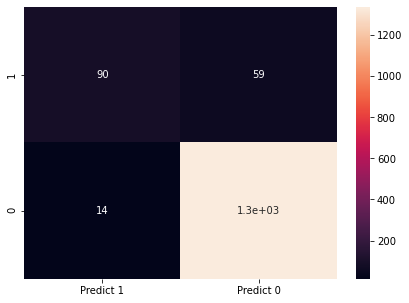

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### <a id = "link16"></a> Graph to show the ROC Curve

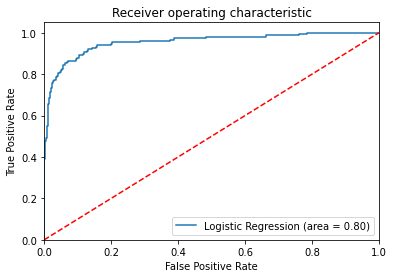

In [ ]:


#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### <a id = "link17"></a> Coefficients of the attrbutes

In [ ]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
11,Education_Undergrad,3.14
7,CD Account,1.74
10,Education_Graduate,0.74
3,Family,0.62
0,Age,0.35
1,Experience,0.35
6,Securities Account,0.33
4,CCAvg,0.25
8,Online,0.23
9,CreditCard,0.20


### <a id = "link18"></a> Rows where the predicted class is not equal to the observed class

In [ ]:
output[output['Observed Loan Status'] != output['Predicted Loan Status']]

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergrad,Observed Loan Status,Predicted Loan Status
3571,42,18,153,3,5.60,416,0,0,0,0,0,1,1,0
4941,28,4,112,2,1.60,0,0,0,1,0,1,0,1,0
1069,44,18,75,2,3.50,0,0,0,1,0,0,1,1,0
2428,39,12,108,4,3.67,301,0,0,0,1,1,0,1,0
1373,60,35,135,3,0.30,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,47,23,149,4,6.10,0,0,0,0,1,0,1,1,0
2345,65,40,89,1,4.10,299,0,1,1,0,0,1,1,0
650,47,22,122,1,5.10,163,1,0,0,0,0,0,1,0
2536,51,25,104,1,4.20,0,0,0,1,0,1,0,1,0


## <a id = "link19"></a> Conclusion Buisness Insights

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that customr will accept the personal loan and the customer accepted the personal loan

*False Positive (observed=0,predicted=1):*

Predicted that customr will accept the personal loan and the customer did not accepted the personal loan

*True Negative (observed=0,predicted=0):*

Predicted that customr will not accept the personal loan and the customer did not accepted the personal loan

*False Negative (observed=1,predicted=0):*

Predicted that customr will not accept the personal loan and the customer accepted the personal loan


##### `Important Features`

"Education" with value "Undergrad" , "CD Account" , "Family" , "Credit Card" 

are the top features which influence the model's output. This is based on the coefficient value.

"Mortgage" - has coefficients value as 0 so this feature doesn't help model in predicting target variable.


##### `Important Metric`

The objective here is for the bank to predict potential customers who can accept the personal loan campain. Hence the key metrric would be **less number of False Negative**, since if False Negative is high the bank might loose potential customers who are good candidates for accepting personal loan , loosing significant loan intrest renevenue stream . 

Hence **Recall is the most important metric**.

In case of False Positive the bank might might not have the customers accept the loan , but those customers are very good target audience to make some customized advertisement for personal loan. As model predicts that those customers have higher chances of accepting personal loan.

Hence **F1 Score is also an valuable metric**.

